# Projekt OS

## Uppgift 0 - Uppvärmning


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import plotly.graph_objects as go
from datetime import datetime
from load_data import ShowMeData


### Tips to solve crash problem of pipfile:
pipenv install --skip-lock dash

In [2]:
athlete_object = ShowMeData("athlete_events.csv")
athlete = athlete_object.parse_data()
print(athlete_object.show_info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB

        Dataframe info:
None

        Name: athlete_events.csv

        Sheet name: None

        Data head():
   ID                      Name Sex   Age  Height  Weight          

In [3]:
regions_object = ShowMeData("noc_regions.csv")
regions = regions_object.parse_data()
print(regions_object.show_info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB

        Dataframe info:
None

        Name: noc_regions.csv

        Sheet name: None

        Data head():
   NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

        Shape: (230, 3)

        Index: RangeIndex(start=0, stop=230, step=1)

        Columns: Index(['NOC', 'region', 'notes'], dtype='object')

        Variables types:
NOC       object
region    object
notes     object
dtype: object
      
        Dataframe description:
        NOC   region                 no

In [4]:
# merge athlete and regions dataset, and count how many left_only data
athlete_regions = pd.merge(athlete, regions, on="NOC", how="left", indicator= True)
athlete_regions["_merge"].value_counts()

both          270767
left_only        349
right_only         0
Name: _merge, dtype: int64

In [5]:
# have a look at left_only data
athlete_regions[athlete_regions["_merge"]=="left_only"].head()
# Then I realize that for "NOC" == "SGP", the Regions dataset do not have information
# However, the Team columns show clearly that "SGP" =="Singapore"
# So, I will generate region value for these nans.

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,_merge
578,332,Zarinah Abdullah,F,21.0,NaN,NaN,Singapore,SGP,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN,NaN,NaN,left_only
579,332,Zarinah Abdullah,F,25.0,NaN,NaN,Singapore,SGP,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN,NaN,NaN,left_only
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.0,68.0,Singapore,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN,NaN,NaN,left_only
7659,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN,NaN,NaN,left_only
7660,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,NaN,NaN,NaN,left_only


In [6]:
# count how many unique rows for these left_only data
# all the left_only data have "SGP" as "NOC"
athlete_regions[athlete_regions["_merge"]=="left_only"]["NOC"].unique()

array(['SGP'], dtype=object)

In [7]:
# check how many "SGP" in athlete dataset
# the number is exactly the left_only data
# So, I only need to change "SGP" to "Singapore"
athlete[athlete["NOC"]=="SGP"].shape

(349, 15)

In [8]:
athlete_regions.loc[(athlete_regions["NOC"]=="SGP", "region")] = "Singapore"
# if athlete_regions["NOC"]=="SGP", replace region to "Singapore"
# if mask is False, then do not change value
athlete_regions[athlete_regions["_merge"]=="left_only"]["region"].unique()

array(['Singapore'], dtype=object)

In [9]:
# count how many region rows are missing
athlete_regions.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region        21
notes     266077
_merge         0
dtype: int64

In [10]:
# check these 21 missing region rows
athlete_regions.loc[athlete_regions["region"].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,_merge
6267,3515,Paulo Amotun Lokoro,M,24.0,170.0,61.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN,NaN,Refugee Olympic Team,both
7908,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,NaN,NaN,Refugee Olympic Team,both
7909,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,NaN,NaN,Refugee Olympic Team,both
21529,11364,Yiech Pur Biel,M,21.0,178.0,62.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 800 metres,NaN,NaN,Refugee Olympic Team,both
31708,16287,Mabika Yolande Bukasa,F,28.0,170.0,70.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Women's Middleweight,NaN,NaN,Refugee Olympic Team,both
40238,20693,James Nyang Chiengjiek,M,24.0,179.0,59.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,NaN,NaN,Refugee Olympic Team,both
61080,31292,Fritz Eccard,M,NaN,NaN,NaN,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN,NaN,Unknown,both
64674,33094,Logona Esau,M,21.0,163.0,69.0,Tuvalu,TUV,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Men's Lightweight,NaN,NaN,Tuvalu,both
119392,60444,Yonas Kinde,M,36.0,172.0,57.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,NaN,NaN,Refugee Olympic Team,both
130721,65813,A. Laffen,M,NaN,NaN,NaN,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN,NaN,Unknown,both


a. hur många länder som är med i datan?

In [11]:
selected_rows = athlete_regions[~athlete_regions['region'].isna()]
print(f"There are {selected_rows['region'].nunique()} countries in the dataset.") 

There are 206 countries in the dataset.


b. vilka länder är med? (förkortningarna räcker)

In [12]:
print(f"The country Ids are:\n{selected_rows['region'].unique().tolist()}") 

The country Ids are:
['China', 'Denmark', 'Netherlands', 'USA', 'Finland', 'Norway', 'Romania', 'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran', 'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia', 'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey', 'Chile', 'Mexico', 'Nicaragua', 'Hungary', 'Nigeria', 'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria', 'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland', 'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan', 'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros', 'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives', 'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia', 'Philippines', 'Singapore', 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan', 'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco', 'Israel', 'Uruguay', 'Sweden', 'Virgin Islands, US', 'Sri Lanka', 'Armenia', 'Ivory Coast', 'Kenya', 'Benin', 'Ukraine', 'UK', 'Ghana', 'Somalia', 'Latvia', '

c. vilka sporter är med?

In [13]:
print(f"The sports are:\n{athlete_regions['Sport'].unique().tolist()}")

The sports are:
['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating', 'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming', 'Badminton', 'Sailing', 'Biathlon', 'Gymnastics', 'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting', 'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh', 'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon', 'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Nordic Combined', 'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing', 'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon', 'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby', 'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo', 'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol', 'Croquet', 'Jeu De Paume', 'Roque', 'Alpinism', 'Basque Pelota', 'Aeronautics']


d. vilka medaljtyper finns det?

In [14]:
print(f"The medals are:\n{(athlete_regions['Medal']).unique()[1:]}")

The medals are:
['Gold' 'Bronze' 'Silver']


e. ta reda på statistik för åldern: medelvärde(mean), median(50%), min, max, standardavvikelse(std),

In [15]:
print(f"The satistics of age are:\n{athlete_regions['Age'].describe().round(2)}")

The satistics of age are:
count    261642.00
mean         25.56
std           6.39
min          10.00
25%          21.00
50%          24.00
75%          28.00
max          97.00
Name: Age, dtype: float64


f. utforska datan vidare med egna frågor

Se även till att plotta några intressanta features, exempelvis:
- g. cirkeldiagram över könsfördelningen

In [16]:
series = athlete_regions.groupby("Sex").size()
series

Sex
F     74522
M    196594
dtype: int64

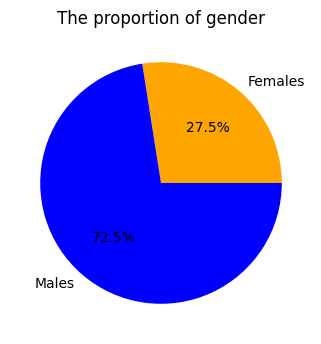

In [17]:
# group by Sex to count the sizes; and generate a series
fig, ax = plt.subplots(dpi=100, figsize=[8,4], facecolor="white")
#labels = series.keys()
ax.pie(x=series, labels=("Females", "Males"), colors=("orange","blue"), autopct="%.1f%%")
ax.set(title="The proportion of gender");


- h. stapeldiagram över topp 10 länder som tagit flest medaljer

The question has two different answers, according to if we groupby "NOC" or "region". 
- NOC - National Olympic Committee 3-letter code
- region in "noc_regions.csv" is the corresponding country name.

However, these two variables are not exact the same:
An example of the difference of "NOC" and "region" is:
- Before 1988 summer, "Russia" in region column, is called "URS" (Soviet Union) 
- Russia is called "RUS" after 1988 summer.
- so, the second most medal country is "URS" if groupby "NOC"
- but, the second most medal country is "Russia" if groupby "region"

In [30]:
athlete_regions[athlete_regions["NOC"]=="URS"].sort_values("Year", ascending=False)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,_merge
117727,59581,Vaclavas Kidykas,M,26.0,197.0,115.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's Discus Throw,NaN,Russia,NaN,both
129875,65382,Aleksey Kuznetsov,M,19.0,190.0,82.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Men's 200 metres Freestyle,NaN,Russia,NaN,both
132357,66619,Nataliya Yuryevna Lapitskaya (-Tsygankova),F,26.0,176.0,68.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Handball,Handball Women's Handball,Bronze,Russia,NaN,both
130020,65445,Nataliya Heorhivna Kvasha,F,25.0,185.0,87.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Women's Single Sculls,NaN,Russia,NaN,both
129920,65409,Yevgeny Borisovich Kuznetsov,M,27.0,180.0,75.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,Gold,Russia,NaN,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74328,37748,Georgy Fyodorov,M,NaN,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Men's Shot Put,NaN,Russia,NaN,both
74325,37747,Boris Fyodorov,M,21.0,182.0,82.0,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Rowing,Rowing Men's Coxed Fours,NaN,Russia,NaN,both
245615,122999,Nina Tyurkina,F,20.0,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Long Jump,NaN,Russia,NaN,both
159582,80091,Galina Yakovlevna Minaicheva (-Sharabidze),F,23.0,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Floor Exercise,NaN,Russia,NaN,both


In [42]:
medals = athlete_regions[~athlete_regions['Medal'].isna()]
region_medals = medals.groupby("NOC").count().reset_index()
region_medals = region_medals.loc[:, ["NOC", "Medal"]]
region_medals = region_medals.sort_values("Medal", ascending=False).head(10)
region_medals.head()

,NOC,Medal
141,USA,5637
139,URS,2503
49,GER,2165
46,GBR,2068
43,FRA,1777


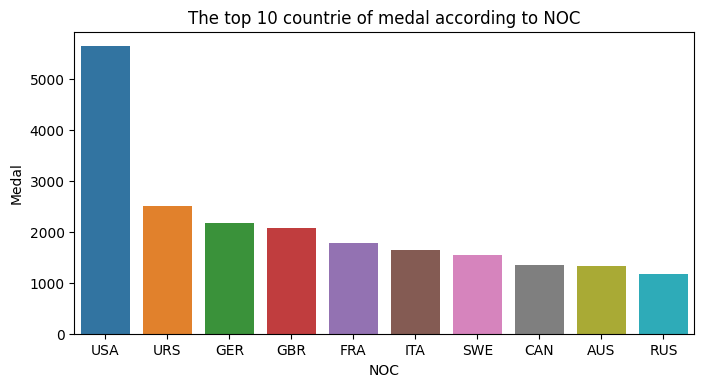

In [43]:
fix, ax = plt.subplots(dpi=100, figsize=[8,4])
sns.barplot(data=region_medals, x="NOC", y="Medal").set(title="The top 10 countrie of medal according to NOC");

In [44]:
medals = athlete_regions[~athlete_regions['Medal'].isna()]
region_medals = medals.groupby("region").count().reset_index()
region_medals = region_medals.loc[:, ["region", "Medal"]]
region_medals = region_medals.sort_values("Medal", ascending=False).head(10)
region_medals.head()

,region,Medal
126,USA,5637
100,Russia,3947
41,Germany,3756
125,UK,2068
38,France,1777


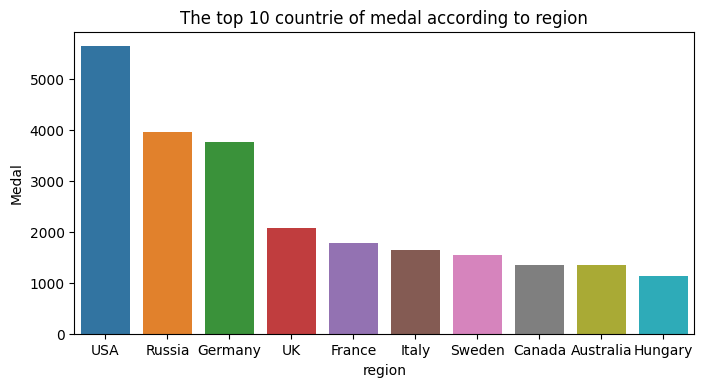

In [45]:
fix, ax = plt.subplots(dpi=100, figsize=[8,4])
sns.barplot(data=region_medals, x="region", y="Medal").set(title="The top 10 countrie of medal according to region");

- i. plotta gärna fler saker som är intressant.

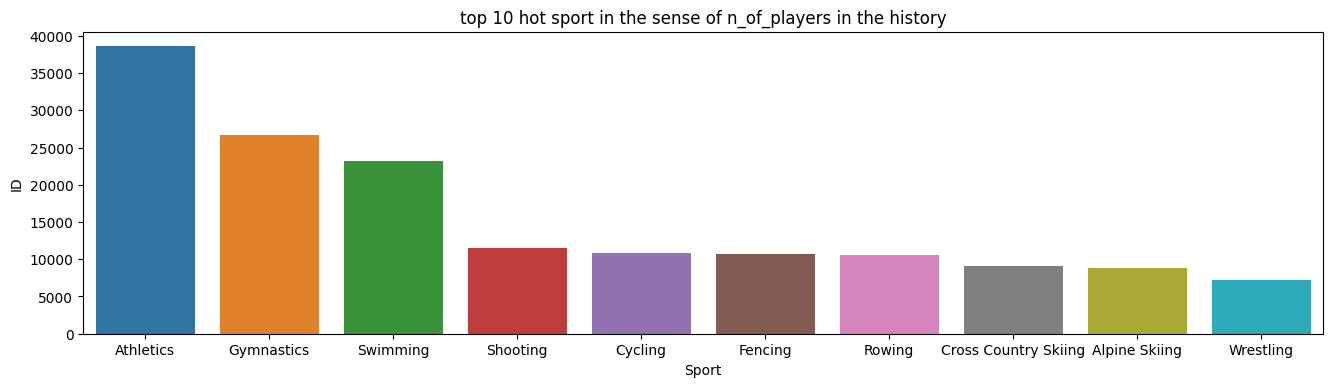

In [20]:
# top 10 hot sport in the sense of n_of_players in the history

sport_players = athlete_regions.groupby("Sport").count()
sport_players = sport_players.sort_values("ID", ascending=False).head(10)
fix, ax = plt.subplots(dpi=100, figsize=[16,4])
sns.barplot(data=sport_players, x=sport_players.index, y="ID").set(title="top 10 hot sport in the sense of n_of_players in the history");


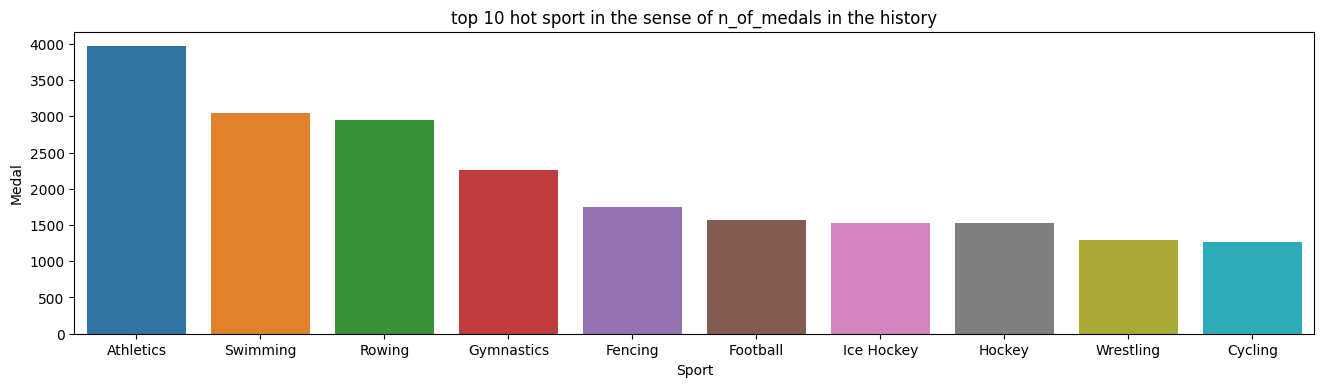

In [21]:
# top 10 hot sport in the sense of medals in the history

sport_medals = athlete_regions.groupby(["Sport"]).count()
sport_medals = sport_medals.sort_values("Medal", ascending=False).head(10)
fix, ax = plt.subplots(dpi=100, figsize=[16,4])
sns.barplot(data=sport_medals, x=sport_medals.index, y="Medal").set(title="top 10 hot sport in the sense of n_of_medals in the history");


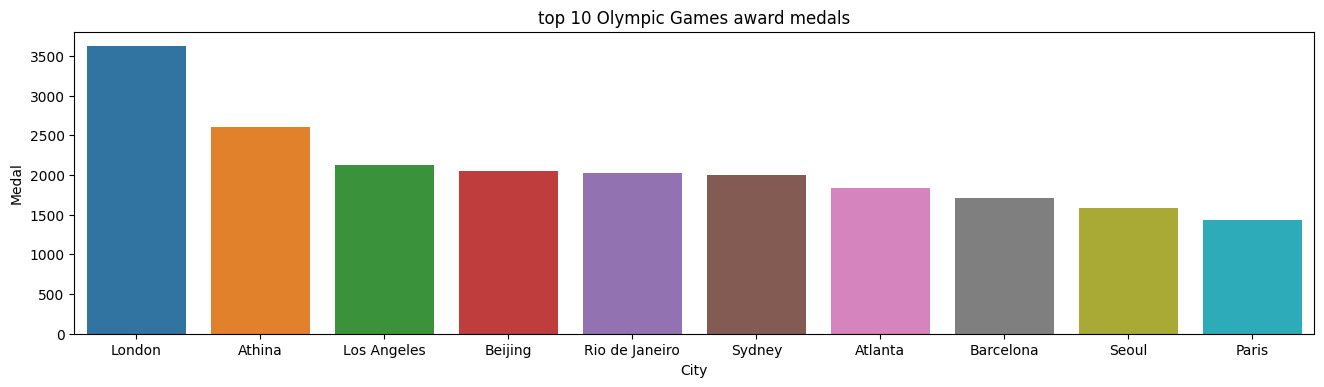

In [22]:
# top 10 Olympic Games award medals

cities_medals = athlete_regions.groupby(["City"]).count()
cities_medals = cities_medals.sort_values("Medal", ascending=False).head(10)
fix, ax = plt.subplots(dpi=100, figsize=[16,4])
sns.barplot(data=cities_medals, x=cities_medals.index, y="Medal").set(title="top 10 Olympic Games award medals");


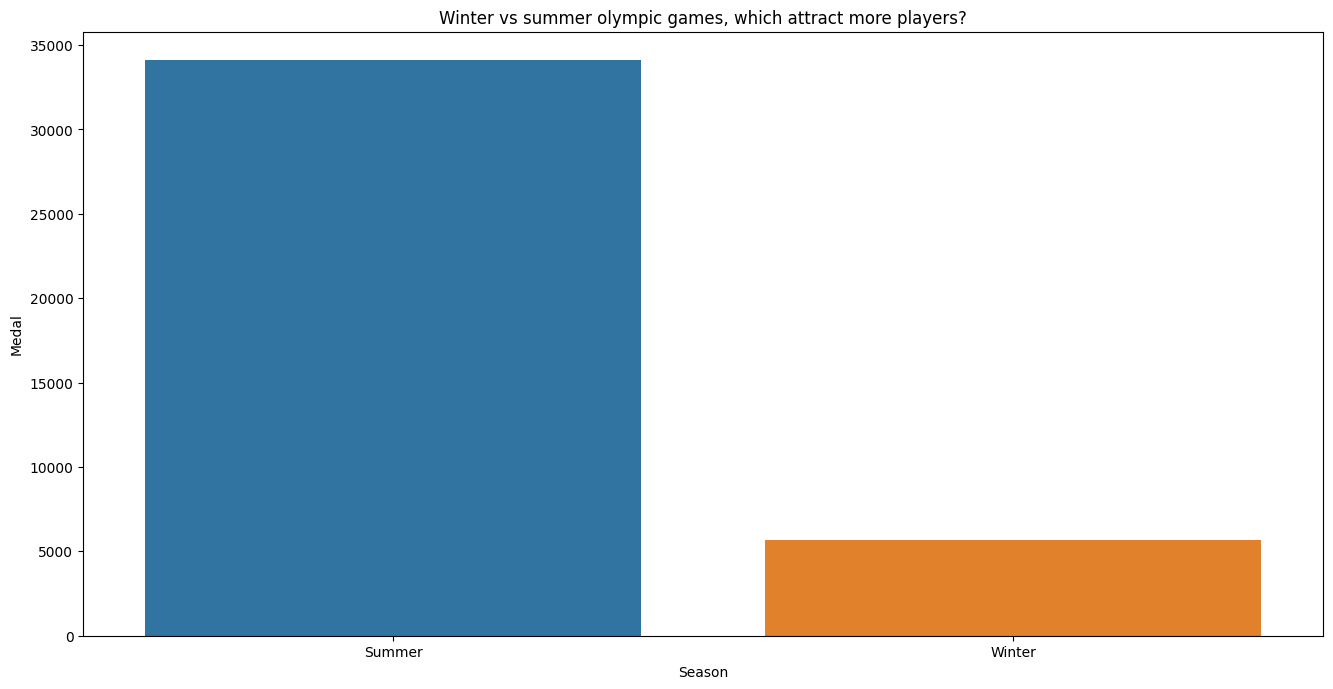

In [23]:
# Winter vs summer olympic games, which attract more players?
seasons = athlete_regions.groupby(["Season"]).count()
seasons = seasons.sort_values("ID", ascending=False)
fix, ax = plt.subplots(dpi=100, figsize=[16,8])
sns.barplot(data=seasons, x=seasons.index, y="Medal").set(title="Winter vs summer olympic games, which attract more players?");
